# Best Advertising Markets

In this project we're going to assume that we're working for an e-learning company that offers programming courses. The courses are on web and mobile development, but the company would like to cover other domains like data science, game development, etc. Our goal for this project will be to find the best two markets to advertise our product in.

## Understanding the Data

We're going to explore a less expensive option for doing our analysis by using existing data that might be relevant for our purpose. We'll use data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers online courses on web development, and their survey contains responses from new coders with varying interests, which is ideal for our analysis. You can find the publicly available data on GitHub [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

First, we'll read in and explore the dataset so we can better understand what we're working with.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
pd.options.display.max_columns = 199

print(fcc.shape)
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for Sample Representativity

We would like to know more about a population of new coders that are interested in the subjects we teach, like where the coders are located, the locations with the greatest number of new coders, how much money new coders are willing to spend on learning. Before we get into our analysis, we'll check our dataset to clarify if it's representative for our population of interest, and see if it has the right categories of people for our purpose.

The `JobRoleInterest` column describes the role(s) each participant would be interested in, which means they would also likely be interested in learning the skills for those roles as well. We'll take a look at the frequency distribution table of this column to see if the data is actually relevant to us.

In [3]:
fcc['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                                                                   6.435927
  Data Scientist                                                                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                                                                      2.030892
  Mobile Developer                                                                                                                                  

After scanning the table we can see that a lot of people are interested in web development, some interested in mobile development, and a few others in other domains. It also looks like a lot of the respondents are interested in more than just one subject. It would be good to get a better idea of how many people are interested in just one subject and how many are interested in multiple subjects. To do this we can split the strings in the `JobRoleInterest` column and analyze it further.

In [4]:
# Cleaning up the column for our frequency table
jri_no_null = fcc['JobRoleInterest'].dropna()
jri_split = jri_no_null.str.split(',')

# Creating our frequency table as percent
num_options = jri_split.apply(lambda x: len(x))
num_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Let's dig a little deeper into this data.

In [5]:
web_or_mobile = jri_no_null.str.contains('Mobile Developer|Web Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


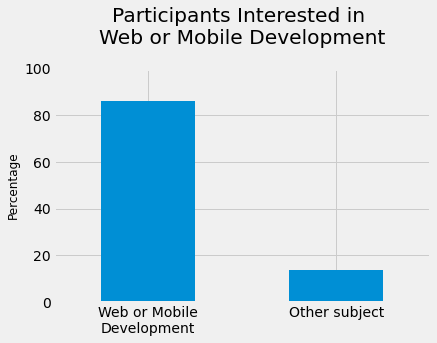

In [6]:
plt.style.use('fivethirtyeight')
freq_table.plot.bar()
plt.title('Participants Interested in \nWeb or Mobile Development', y = 1.08)
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or Mobile\nDevelopment', 'Other subject'], rotation = 0)
plt.ylim([0,100])
plt.show()

In this survey, more than 80% are interested in web or mobile development. Therefore we can consider our sample representative for our population of interest.

## Location and Densities of New Coders

Now let's find out where these new coders are located and the density of coders for each location.

For this analysis, we'll work with the `CountryLive` variable which tells us where the person currently lives, as opposed to the `CountryCitizen` variable which only tells us where that person is from. We'll consider each country as individual markets and look to find the best two countries to advertise in. 

One indicator of a good market is the number of potential customers, so finding this number will be important in getting the answer we're looking for.

In [7]:
# Isolating the participants that answered JobRoleInterest
fcc_no_null = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_freq = fcc_no_null['CountryLive'].value_counts()
relative_freq = round(fcc_no_null['CountryLive'].value_counts(normalize = True) * 100, 2)

# Display the frequency table in a readable format
pd.DataFrame(data = {'Absolute Frequency': absolute_freq,
                     'Percentage': relative_freq}
            )

,Absolute Frequency,Percentage
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
...,...,...
Channel Islands,1,0.01
Rwanda,1,0.01
Samoa,1,0.01
Botswana,1,0.01


The US market contains 45.7% of potential customers. India comes in next at 7.7%, closely followed by the UK at 4.6% and Canada at 3.8%. This information is good to know, but we'll need to go more in depth to figure out how much money people are actually willing to spend on learning in these countries. Advertising in high-density markets won't be useful if our potential customers aren't actually willing spend money on learning, which brings us to the next part of our analysis.

## Spending Money for Learning

In the `MoneyForLearning` column we have the amount of US dollars spent by the participant from when they started coding until the moment they completed the survey. Our hypothetical company sells subscriptions at $59 per month, so we'd like to find out how much money each student spends per month to find out how many might pay for our service. We'll work with just our top four countries from above because 1) we'll have more data for these countries, and 2) English is an official language in these four countries and our courses are in English only. 

We can start by creating a new column that contains the amount of money spent per month by each student. We'll divide `MoneyForLearning` by the `MonthsProgramming` column to get this number, but we'll have to replace the 0s in the `MonthsProgramming` column with 1s to avoid division by 0 errors.

In [8]:
# Replace 0s with 1s
fcc_no_null['MonthsProgramming'].replace(0, 1, inplace = True)

# Create new column representing money spent per month by each student
fcc_no_null['monthly_spending'] = fcc_no_null['MoneyForLearning'] / fcc_no_null['MonthsProgramming']
fcc_no_null['monthly_spending'].isnull().sum()

675

In [9]:
# Keep only the non-null rows in our new column
fcc_no_null = fcc_no_null[fcc_no_null['monthly_spending'].notnull()]

In [10]:
# Removing rows with null values in CountryLive
fcc_no_null = fcc_no_null[fcc_no_null['CountryLive'].notnull()]

# Look at value counts to make sure we still have enough data to work with
fcc_no_null['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [11]:
# Average amount of money spent each month
country_mean = fcc_no_null.groupby('CountryLive').mean()
country_mean['monthly_spending'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: monthly_spending, dtype: float64

In [12]:
country_median = fcc_no_null.groupby('CountryLive').median()
country_median['monthly_spending'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    3.333333
India                       0.000000
United Kingdom              0.000000
Canada                      0.000000
Name: monthly_spending, dtype: float64

These results could be correct, but we need to consider that we don't have enough representative data for the UK and Canada, or that we have some outliers. It doesn't make intuitive sense that the UK spending would be so low.

## Dealing with Outliers

Next let's visualize the distribution of `monthly_spending` values for each country to see if we have any outliers.

In [13]:
# Isolate the countries we're analyzing
uiuc = fcc_no_null[
    fcc_no_null['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')
]

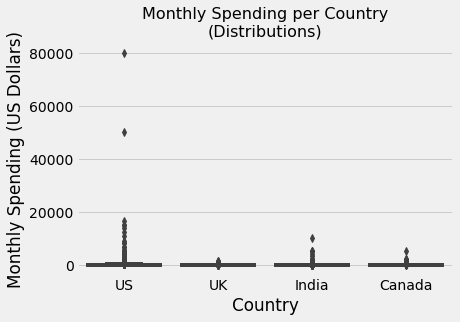

In [14]:
# Box plot to visualize the distribution
import seaborn as sns

sns.boxplot(y = 'monthly_spending', x = 'CountryLive', data = uiuc)
plt.title('Monthly Spending per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Monthly Spending (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

The most noticeable thing we see in our box plot is that there are two obvious outliers where their response for monthly spending about $50,000 and $80,000. This seems unlikely, so we'll remove these values by keeping only those values that fall underneath $20,000.

In [15]:
# Removing the two outliers seen above
fcc_no_null = fcc_no_null[
    fcc_no_null['monthly_spending'] < 20000
]

In [16]:
# Recompute the averages
country_mean = fcc_no_null.groupby('CountryLive').mean()
country_mean['monthly_spending'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: monthly_spending, dtype: float64

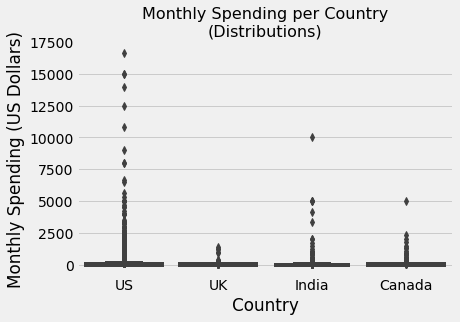

In [17]:
# Re-isolate the countries we're analyzing
uiuc = fcc_no_null[
    fcc_no_null['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')
]

# Box plot to visualize the new distribution
sns.boxplot(y = 'monthly_spending', x = 'CountryLive', data = uiuc)
plt.title('Monthly Spending per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Monthly Spending (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

Now we're able to see a few more outliers like those in India above $2,500. This could still be good data. It's possible these respondents attended a few bootcamps which tend to be very expensive. Let's examine these data points further.

In [18]:
# Inspect India's outliers
india_outliers = uiuc[
    (uiuc['CountryLive'] == 'India') &
    (uiuc['monthly_spending'] >= 2500)
]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,N

It's difficult to figure out from our data if these people really spent that much money on learning to code in US Dollars. We'll remove these rows because they seem unlikely to be true.

In [19]:
# Removing India's outliers
uiuc = uiuc.drop(india_outliers.index)

In our last box plot we can see there are more US outliers where the monthly spending is above $6,000. Let's look at these data points as well.

In [20]:
# Inspect US outliers
us_outliers = uiuc[
    (uiuc['CountryLive'] == 'United States of America') &
    (uiuc['monthly_spending'] >= 6000)
]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Above we can see that six respondents attended bootcamps, and this could justify the larger sums of money spend on learning. Again, with the other five respondents, it's difficult to tell if the monthly spending is true. For this reason we'll remove the rows where participants reported that they spend more than $6,000 per month but have not attended a bootcamp.

We'll also remove the respondents that had been programming for three months or fewer since their monthly spending on learning could represent what they spend for just those few months only.

In [21]:
# Remove respondents that didn't attend a bootcamp
no_bootcamp = uiuc[
    (uiuc['CountryLive'] == 'United States of America') &
    (uiuc['monthly_spending'] >= 6000) &
    (uiuc['AttendedBootcamp'] == 0)
]

uiuc = uiuc.drop(no_bootcamp.index)

# Remove respondents that programmed for fewer than 3 months
three_months = uiuc[
    (uiuc['CountryLive'] == 'United States of America') &
    (uiuc['monthly_spending'] >= 6000) &
    (uiuc['MonthsProgramming'] <= 3)
]

uiuc = uiuc.drop(three_months.index)

In our box plot we also see that Canada had one outlier who spent around $5,000 per month on learning. Let's look at this individual's responses.

In [22]:
# Inspect Canada's outlier
canada_outlier = uiuc[
    (uiuc['CountryLive'] == 'Canada') &
    (uiuc['monthly_spending'] > 4500)
]

canada_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,monthly_spending
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [23]:
# Remove Canada's Outlier
uiuc = uiuc.drop(canada_outlier.index)

In [24]:
# Recompute the averages
uiuc.groupby('CountryLive').mean()['monthly_spending']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: monthly_spending, dtype: float64

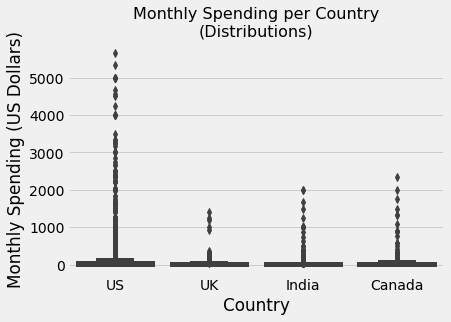

In [25]:
# Box plot to visualize the new distribution
sns.boxplot(y = 'monthly_spending', x = 'CountryLive', data = uiuc)
plt.title('Monthly Spending per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Monthly Spending (US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

## Choosing the Best Markets

After eliminating the outliers we can get a better idea of what two markets we should be advertising in. Considering the results we've seen so far, we know we should be advertising in the US because there are so many new coders living there that are willing to pay for learning services. Canada could be the best 2nd choice because people there are willing to pay a higher price for learning each month compared to the UK and India.

The data suggests we shouldn't be advertising in the UK, but let's take a closer look at India before we make our final decision. Because of population density, our advertising could reach a lot more people in India than in Canada.

In [26]:
# Frequency table for 'CountryLive
round(uiuc['CountryLive'].value_counts(normalize = True) * 100, 2)

United States of America    74.97
India                       11.73
United Kingdom               7.16
Canada                       6.14
Name: CountryLive, dtype: float64

After looking at the frequency table for the `CountryLive` columns, it's less clear what market we should choose to advertise in other than the US. 

One of the best options might be to split the advertising budget between the US, India, and Canada. We could do something like:

* 65% for the US
* 20% for India
* 15% for Canada

Another option could be to choose the US and either India or Canada. And our last option could be just to focus on marketing in the US only since it is by far our best option. At this point, it would probably be best to consult with the marketing team and let them make the final decisions. They may want to survey India and Canada to collect more data before making a decision to advertise there.


## Conclusion & Next Steps

In this project we analyzed survey data from coders to find the best markets to advertise in. 

Some next steps to continue our analysis could be to find other criteria for choosing the best market, or we could analyze other similar datasets like freeCodeCamp's 2016 New Coders Survey and Stack Overflow 2018 Developer Survey.

The idea for this project comes from the [DATAQUEST](https://app.dataquest.io/) **Statistics Intermediate: Averages and Variability** course.